<a href="https://colab.research.google.com/github/BhargavKilambi/sem-7/blob/master/existing_cnn_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp "drive/My Drive/Imageproc.zip" "Imageproc.zip"

In [3]:
!unzip "Imageproc.zip"

Archive:  Imageproc.zip
   creating: Imageproc/
   creating: Imageproc/cel/
  inflating: Imageproc/cel/008__[cel][nod][cla]0058__1.wav.jpg  
  inflating: Imageproc/cel/008__[cel][nod][cla]0058__2.wav.jpg  
  inflating: Imageproc/cel/008__[cel][nod][cla]0058__3.wav.jpg  
  inflating: Imageproc/cel/012__[cel][nod][cla]0043__1.wav.jpg  
  inflating: Imageproc/cel/012__[cel][nod][cla]0043__2.wav.jpg  
  inflating: Imageproc/cel/012__[cel][nod][cla]0043__3.wav.jpg  
  inflating: Imageproc/cel/013__[cel][nod][cla]0025__1.wav.jpg  
  inflating: Imageproc/cel/013__[cel][nod][cla]0025__2.wav.jpg  
  inflating: Imageproc/cel/013__[cel][nod][cla]0025__3.wav.jpg  
  inflating: Imageproc/cel/014__[cel][nod][cla]0041__1.wav.jpg  
  inflating: Imageproc/cel/014__[cel][nod][cla]0041__2.wav.jpg  
  inflating: Imageproc/cel/014__[cel][nod][cla]0041__3.wav.jpg  
  inflating: Imageproc/cel/027__[cel][nod][cla]0027__1.wav.jpg  
  inflating: Imageproc/cel/027__[cel][nod][cla]0027__2.wav.jpg  
  inflating: I

# Visualizing the available data

In [0]:
import cv2
import numpy as np
import os

In [0]:
def num_of_files(dir1):
  count = 0
  for p1 in os.listdir(dir1):
    count += len(os.listdir(dir1 + '/' + p1))
  return count

In [0]:
fp = "Imageproc"
classes = os.listdir(fp)

no_f = num_of_files(fp)

train_p,test_p,val_p = 0.7,0.2,0.1

X = []
Y = []

for idx,cl in enumerate(classes):
  path = fp + '/' + cl
  for it in os.listdir(path):
    file_path = path + '/' + it
    img = cv2.resize(cv2.imread(file_path),(128,96),interpolation=cv2.INTER_LINEAR)
    X.append(img)
    ind = classes.index(cl)
    vec = np.zeros(len(classes))
    vec[ind] = 1
    Y.append(vec)

In [0]:
X = np.array(X)
Y = np.array(Y)

In [0]:
def shuffle_XY_paths(X,Y):
    assert (X.shape[0] == Y.shape[0] )
    idx = np.array(range(Y.shape[0]))
    np.random.shuffle(idx)
    newX = np.copy(X)
    newY = np.copy(Y)
    for i in range(len(idx)):
        newX[i] = X[idx[i],:,:]
        newY[i] = Y[idx[i],:]
    return newX, newY

In [0]:
X,Y=shuffle_XY_paths(X,Y)

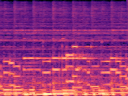

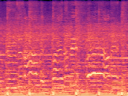

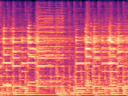

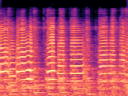

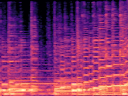

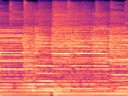

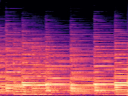

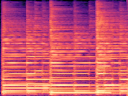

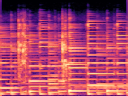

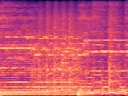

In [8]:
from google.colab.patches import cv2_imshow
for i in range(0,10):
  cv2_imshow(X[i])

In [9]:
train_len = int(train_p * no_f)
test_len = int(test_p * no_f)
val_len = int(val_p * no_f)
print(train_len,test_len,val_len)

4693 1341 670


In [0]:
X_train,X_test,X_val = X[:train_len,:,:],X[train_len:train_len+test_len,:,:],X[train_len+test_len:,:,:]

In [0]:
Y_train,Y_test,Y_val = Y[:train_len,:],Y[train_len:train_len+test_len,:],Y[train_len+test_len:,:]

# Modelling the CNN

In [14]:
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.models import Sequential
from keras.regularizers import l2
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
def create_model(X):
  input_shape = (X.shape[1],X.shape[2],X.shape[3])
  kernel = (3,3)
  pool_size = (2,2)
  filters = [32,32,32,128]
  model = Sequential()
  nb_layers = 3
  model.add(Conv2D(32,kernel_size=kernel,padding="same",input_shape=input_shape,activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
  
  model.add(Conv2D(32,padding="same",kernel_size=kernel,activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
  model.add(MaxPooling2D(pool_size=pool_size))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  
  model.add(Conv2D(32,padding="same",kernel_size=kernel,activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
  model.add(MaxPooling2D(pool_size=pool_size))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  
  model.add(Conv2D(64,padding="same",kernel_size=kernel,activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
  model.add(MaxPooling2D(pool_size=pool_size))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  
  model.add(Conv2D(64,padding="same",kernel_size=kernel,activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
  model.add(MaxPooling2D(pool_size=pool_size))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  
  
  model.add(Dense(128,activation='relu'))
  model.add(Dropout(0.5))
  
  
  model.add(Dense(11,activation='softmax'))
  
  return model

In [181]:
model = create_model(X_train)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6, amsgrad=False),metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint
load_checkpoint = True
checkpoint_filepath = 'cnn_images1.hdf5'
if (load_checkpoint):
    print("Looking for previous weights...")
    if ( os.path.isfile(checkpoint_filepath) ):
        print ('Checkpoint file detected. Loading weights.')
        model.load_weights(checkpoint_filepath)
    else:
        print ('No checkpoint file detected.  Starting from scratch.')
else:
    print('Starting from scratch (no checkpoint)')
checkpointer = ModelCheckpoint(filepath=checkpoint_filepath, verbose=1, save_best_only=True)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 96, 128, 32)       896       
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 96, 128, 32)       9248      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 48, 64, 32)        0         
_________________________________________________________________
batch_normalization_59 (Batc (None, 48, 64, 32)        128       
_________________________________________________________________
dropout_111 (Dropout)        (None, 48, 64, 32)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 48, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 24, 32, 32)      

In [182]:
batch_size = 32
nb_epoch = 100
hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
      verbose=1, validation_data=(X_val, Y_val), callbacks=[checkpointer])
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 4693 samples, validate on 671 samples
Epoch 1/100
4693/4693 [==============================] - 16s 3ms/step - loss: 4.4563 - acc: 0.1538 - val_loss: 3.9963 - val_acc: 0.1863

Epoch 00001: val_loss improved from inf to 3.99632, saving model to cnn_images1.hdf5
Epoch 2/100
4693/4693 [==============================] - 10s 2ms/step - loss: 4.0241 - acc: 0.1903 - val_loss: 3.9110 - val_acc: 0.2325

Epoch 00002: val_loss improved from 3.99632 to 3.91102, saving model to cnn_images1.hdf5
Epoch 3/100
4693/4693 [==============================] - 9s 2ms/step - loss: 3.9306 - acc: 0.2152 - val_loss: 3.8215 - val_acc: 0.2414

Epoch 00003: val_loss improved from 3.91102 to 3.82145, saving model to cnn_images1.hdf5
Epoch 4/100
4693/4693 [==============================] - 9s 2ms/step - loss: 3.8431 - acc: 0.2357 - val_loss: 3.7502 - val_acc: 0.2757

Epoch 00004: val_loss improved from 3.82145 to 3.75019, saving model to cnn_images1.hdf5
Epoch 5/100
4693/4693 [==============================] 

In [0]:
model.save('cnn_somewhat1.hdf5')

In [0]:
hist.history.keys()
history = hist

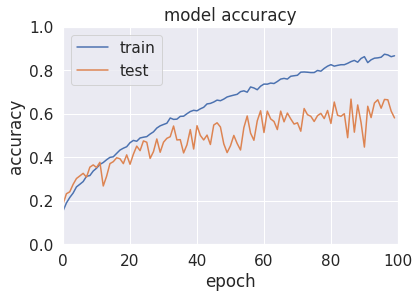

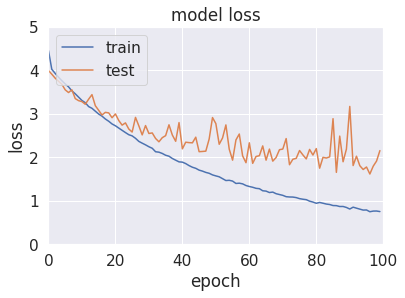

In [190]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0,100,0,1])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0,100,0,5])
plt.show()

In [0]:
y_pred = model.predict_classes(X_test)

In [114]:
type(y_pred)

numpy.ndarray

In [0]:
y_pred1 = []
for j in y_pred:
  vec = np.zeros(len(classes))
  ind = np.where(j == np.amax(j))
  vec[ind] = 1.
  y_pred1.append(vec)
  
y_pred1 = np.array(y_pred1)

In [119]:
y_pred1[1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [0]:
y_test1 = []
for j in Y_test:
  ind = np.where(j == np.amax(j))
  y_test1.append(ind[0][0])

y_test1 = np.array(y_test1)

In [129]:
y_test1[0]

0

In [194]:
import sklearn.metrics as skm

cm = skm.confusion_matrix(y_test1, y_pred)
print(cm)
print( skm.classification_report(y_test1,y_pred))

[[ 30   5   2  47   1  11   6   6   2   1   0]
 [  1  38   4  36   2   1   3   0   9   1   0]
 [  0   0  89  33   0   1   1   0   1   0   0]
 [  0   0   4 133   0   0   2   0   1   1   0]
 [  0   5   4  38  45   2   8   2   5   8   0]
 [  0   0   1  13   0  72   2   4   3   1   0]
 [  0   2  14  47   0   3  93   4   8   0   0]
 [  5   1   5  42   4  14   2  38   2   2   0]
 [  0   1   2  33   0   2   5   0  99   0   0]
 [  0   5   4  20   5   2   3   2   0  36   0]
 [  0   2   7  30   3   3  25   6   8   1  66]]
              precision    recall  f1-score   support

           0       0.83      0.27      0.41       111
           1       0.64      0.40      0.49        95
           2       0.65      0.71      0.68       125
           3       0.28      0.94      0.43       141
           4       0.75      0.38      0.51       117
           5       0.65      0.75      0.70        96
           6       0.62      0.54      0.58       171
           7       0.61      0.33      0.43      

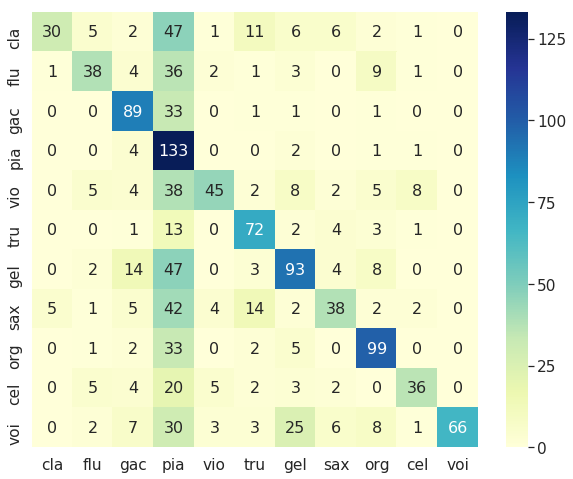

In [196]:
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm)
sn.set(font_scale=1.4)
plt.subplots(figsize=(10,8))
ax = sn.heatmap(df_cm, annot=True,fmt="g",xticklabels=classes,yticklabels=classes,annot_kws={"size": 16},cmap="YlGnBu")